## Back Test Results Binary Classification

In [1]:
import pandas as pd
from datetime import datetime, timezone
from pycaret.datasets import get_data
from pycaret.classification import *
import yaml
import time
import warnings
warnings.filterwarnings('ignore')

In [2]:
with open ('back_test_pipeline_settings.yaml') as ymlfile:
    cfg = yaml.safe_load(ymlfile)
    pair = cfg['currency']['pair']
    frac = cfg['model']['frac']
    random_state = cfg['model']['random_state']

In [3]:
print('Pair:', pair)
print('Fraction:', frac)
print('Random State:', random_state)

Pair: USDCAD
Fraction: 0.7
Random State: 705


In [4]:
now = datetime.now()
today = now.strftime("%d-%m-%Y_%I-%M_%p")

In [5]:
dataset = pd.read_csv('01_Back_Test_Data.csv')
dataset.shape

(8000, 11)

In [6]:
dataset.head()

,Candle_No,Current_Market_Fit,Current_Market,Rec1_Score,Rec1_Prediction,Rec2_Score,Rec2_Prediction,Rec3_Score,Rec3_Prediction,Rec4_Score,Rec4_Prediction
0,9194.0,42.308175,Bearish,71.071654,SELL,97.572385,SELL,28.799490,SELL,85.762444,SELL
1,5507.0,33.339706,Bullish,66.961080,BUY,37.886877,SELL,13.155254,BUY,81.161802,BUY
2,2777.0,43.270233,Bearish,95.938778,BUY,2.133071,BUY,46.326446,BUY,25.740303,SELL
3,10079.0,0.038021,Bullish,80.800341,SELL,64.268728,SELL,48.193146,SELL,69.665082,SELL
4,3476.0,6.853375,Bearish,9.044032,SELL,4.241328,BUY,8.698453,SELL,58.980401,SELL


## Drop Predictions with Less than 20% LR Fit

In [7]:
dataset = dataset[dataset['Current_Market_Fit'] > 20]
dataset = dataset.reset_index()
del dataset['index']

In [8]:
dataset.shape

(5706, 11)

## One-Hot Encoding

In [9]:
dataset['Current_Market'] = dataset['Current_Market'].replace(['Bullish','Bearish'],[1,0])
dataset['Rec1_Prediction'] = dataset['Rec1_Prediction'].replace(['BUY','SELL'],[1,-1])
dataset['Rec2_Prediction'] = dataset['Rec2_Prediction'].replace(['BUY','SELL'],[1,-1])
dataset['Rec3_Prediction'] = dataset['Rec3_Prediction'].replace(['BUY','SELL'],[1,-1])
dataset['Rec4_Prediction'] = dataset['Rec4_Prediction'].replace(['BUY','SELL'],[1,-1])

In [10]:
dataset['Rec1_Score'] = dataset['Rec1_Score'] * dataset['Rec1_Prediction']
dataset['Rec2_Score'] = dataset['Rec2_Score'] * dataset['Rec2_Prediction']
dataset['Rec3_Score'] = dataset['Rec3_Score'] * dataset['Rec3_Prediction']
dataset['Rec4_Score'] = dataset['Rec4_Score'] * dataset['Rec4_Prediction']

In [11]:
dataset['Rec1_Score'] = dataset['Rec1_Score'].round(2)
dataset['Rec2_Score'] = dataset['Rec2_Score'].round(2)
dataset['Rec3_Score'] = dataset['Rec3_Score'].round(2)
dataset['Rec4_Score'] = dataset['Rec4_Score'].round(2)

In [12]:
dataset = dataset.drop([
    'Candle_No',
    'Current_Market_Fit',
    'Rec1_Prediction',
    'Rec2_Prediction',
    'Rec3_Prediction',
    'Rec4_Prediction',
], axis=1)

In [13]:
dataset.head()

,Current_Market,Rec1_Score,Rec2_Score,Rec3_Score,Rec4_Score
0,0,-71.07,-97.57,-28.80,-85.76
1,1,66.96,-37.89,13.16,81.16
2,0,95.94,2.13,46.33,-25.74
3,1,-59.22,4.73,12.07,-46.19
4,1,54.02,-35.16,-29.36,14.96


In [14]:
data = dataset.sample(frac=frac, random_state=random_state).reset_index(drop=True)
data_unseen = dataset.drop(data.index).reset_index(drop=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))
print('Fraction: ' + str(frac))
#print('Random State: ', str(random_state))

Data for Modeling: (3994, 5)
Unseen Data For Predictions: (1712, 5)
Fraction: 0.7


# Create Unseen DataFrame

In [15]:
data_unseen.shape

(1712, 5)

In [16]:
data_unseen.head()

,Current_Market,Rec1_Score,Rec2_Score,Rec3_Score,Rec4_Score
0,1,-30.74,-77.32,-3.16,-84.20
1,1,-66.16,1.12,95.23,47.05
2,1,-85.38,86.51,72.26,-79.79
3,0,92.89,-12.77,-77.85,-18.07
4,1,-58.68,9.78,-56.22,-43.44


In [17]:
exp_name = setup(data = data,
                 target = 'Current_Market',
#                 fold_shuffle=True,
                 session_id=123,
                 silent=True,
#                 n_jobs = 64,
#                 imputation_type='iterative'
                ) 

,Description,Value
0,session_id,123
1,Target,Current_Market
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(3994, 5)"
5,Missing Values,True
6,Numeric Features,4
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [18]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.5242,0.5245,0.5552,0.5321,0.5430,0.0472,0.0472,0.1740
et,Extra Trees Classifier,0.5199,0.5279,0.5348,0.5284,0.5313,0.0392,0.0393,0.0830
dt,Decision Tree Classifier,0.5045,0.5042,0.5207,0.5132,0.5168,0.0083,0.0083,0.1580
lr,Logistic Regression,0.5027,0.4865,0.7414,0.5076,0.6016,-0.0036,-0.0025,0.2450
ridge,Ridge Classifier,0.5027,0.0000,0.7414,0.5076,0.6016,-0.0036,-0.0025,0.1490
lda,Linear Discriminant Analysis,0.5027,0.4865,0.7414,0.5076,0.6016,-0.0036,-0.0025,0.0060
rf,Random Forest Classifier,0.5016,0.5099,0.5159,0.5101,0.5125,0.0027,0.0029,0.2340
svm,SVM - Linear Kernel,0.5013,0.0000,0.5053,0.5101,0.5075,0.0024,0.0024,0.1580
lightgbm,Light Gradient Boosting Machine,0.4995,0.4978,0.5264,0.5073,0.5162,-0.0020,-0.0020,0.0230
qda,Quadratic Discriminant Analysis,0.4916,0.4857,0.6240,0.5009,0.5554,-0.0219,-0.0232,0.0100


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

In [19]:
break

SyntaxError: 'break' outside loop (668683560.py, line 1)

In [20]:
with open ('back_test_pipeline_settings.yaml') as ymlfile:
    cfg = yaml.safe_load(ymlfile)
    model = cfg['model']['name']

In [21]:
print('Model Name:', model)

Model Name: knn


In [22]:
MODEL = create_model(model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5571,0.5708,0.5734,0.5655,0.5694,0.1136,0.1136
1,0.5357,0.5289,0.5524,0.5448,0.5486,0.0707,0.0707
2,0.5179,0.5028,0.5315,0.5278,0.5296,0.0351,0.0351
3,0.4929,0.4932,0.5704,0.5000,0.5329,-0.0166,-0.0167
4,0.5071,0.5004,0.5563,0.5130,0.5338,0.0129,0.0129
5,0.4910,0.5068,0.5775,0.5000,0.5359,-0.0211,-0.0214
6,0.5735,0.5881,0.5915,0.5793,0.5854,0.1464,0.1464
7,0.4767,0.4525,0.4859,0.4859,0.4859,-0.0469,-0.0469
8,0.5341,0.5186,0.5423,0.5423,0.5423,0.0678,0.0678
9,0.5556,0.5829,0.5704,0.5625,0.5664,0.1106,0.1106


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


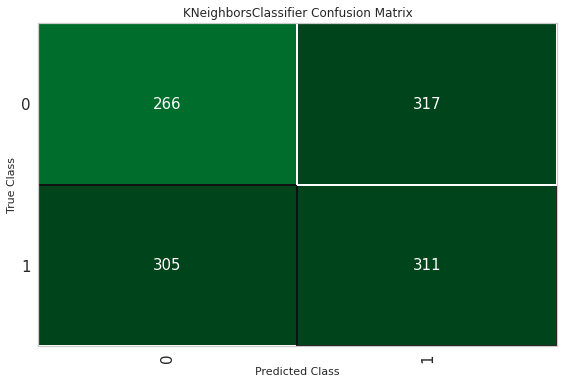

In [23]:
plot_model(MODEL, plot = 'confusion_matrix')

In [24]:
TUNED_MODEL = tune_model(MODEL)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5571,0.5655,0.6014,0.5621,0.5811,0.1125,0.1128
1,0.5607,0.5351,0.5315,0.5758,0.5527,0.1225,0.1229
2,0.4857,0.4978,0.5734,0.4970,0.5325,-0.0325,-0.0329
3,0.5000,0.4994,0.5352,0.5067,0.5205,-0.0010,-0.0010
4,0.5250,0.5116,0.6268,0.5266,0.5723,0.0472,0.0481
5,0.5161,0.4929,0.5563,0.5232,0.5392,0.0308,0.0309
6,0.5448,0.5517,0.5634,0.5517,0.5575,0.0890,0.0890
7,0.4803,0.4766,0.4859,0.4894,0.4876,-0.0396,-0.0396
8,0.5269,0.5439,0.5563,0.5338,0.5448,0.0527,0.0528
9,0.5591,0.5727,0.5775,0.5655,0.5714,0.1177,0.1177


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


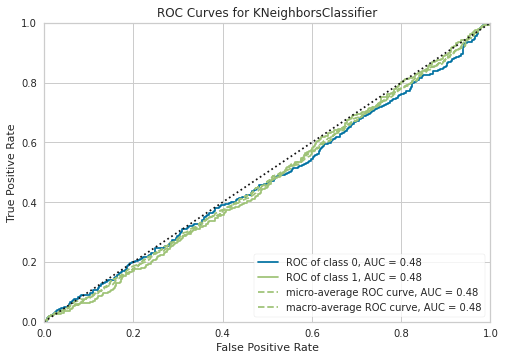

In [25]:
plot_model(TUNED_MODEL, plot = 'auc')

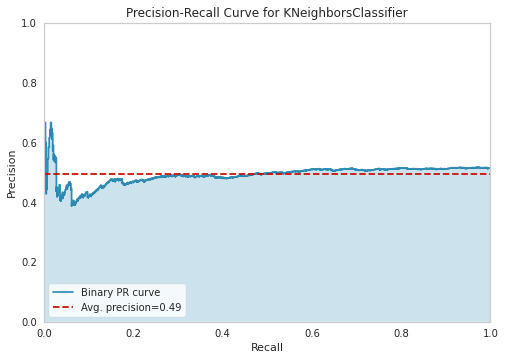

In [26]:
plot_model(TUNED_MODEL, plot = 'pr')

In [27]:
plot_model(TUNED_MODEL, plot='feature')

TypeError: Feature Importance and RFE plots not available for estimators that doesnt support coef_ or feature_importances_ attribute.

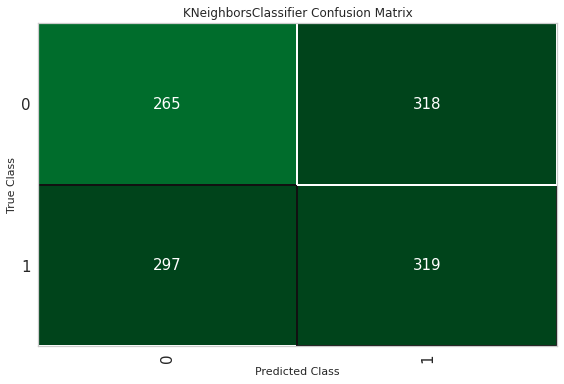

In [28]:
plot_model(TUNED_MODEL, plot = 'confusion_matrix')

In [29]:
predict_model(TUNED_MODEL);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,K Neighbors Classifier,0.4871,0.4768,0.5179,0.5008,0.5092,-0.0276,-0.0276


In [30]:
FINAL_MODEL = finalize_model(TUNED_MODEL)

In [31]:
print(FINAL_MODEL)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=-1, n_neighbors=12, p=2,
                     weights='distance')


In [32]:
predict_model(FINAL_MODEL);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,K Neighbors Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [33]:
unseen_predictions = predict_model(FINAL_MODEL, data=data_unseen)
unseen_predictions.head()

,Current_Market,Rec1_Score,Rec2_Score,Rec3_Score,Rec4_Score,Label,Score
0,1,-30.74,-77.32,-3.16,-84.20,1,1.0000
1,1,-66.16,1.12,95.23,47.05,1,0.6445
2,1,-85.38,86.51,72.26,-79.79,1,1.0000
3,0,92.89,-12.77,-77.85,-18.07,0,1.0000
4,1,-58.68,9.78,-56.22,-43.44,1,0.5137


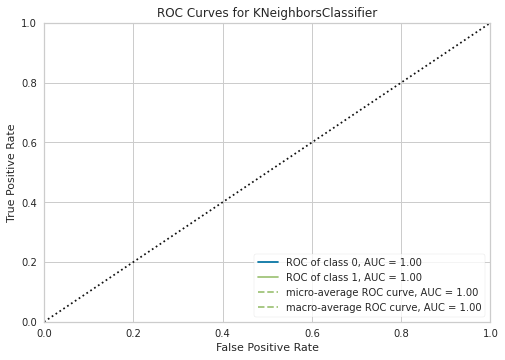

In [34]:
plot_model(FINAL_MODEL, plot = 'auc')

In [35]:
pkl_name = (today + "_" + model + "_" + pair)

In [36]:
save_model(FINAL_MODEL, pkl_name)

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=False, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[],
                                       target='Current_Market',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 nume...
                 ('fix_perfect', Remove_100(target='Current_Market')),
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                 ('dfs', 'p

In [37]:
SAVED_FINAL_MODEL = load_model(pkl_name)

Transformation Pipeline and Model Successfully Loaded


In [38]:
new_prediction = predict_model(SAVED_FINAL_MODEL, data=data_unseen)

In [39]:
data_unseen.shape

(1712, 5)

In [40]:
new_prediction.head(20)

,Current_Market,Rec1_Score,Rec2_Score,Rec3_Score,Rec4_Score,Label,Score
0,1,-30.74,-77.32,-3.16,-84.20,1,1.0000
1,1,-66.16,1.12,95.23,47.05,1,0.6445
2,1,-85.38,86.51,72.26,-79.79,1,1.0000
3,0,92.89,-12.77,-77.85,-18.07,0,1.0000
4,1,-58.68,9.78,-56.22,-43.44,1,0.5137
5,0,-20.94,-3.04,-29.72,-39.15,0,1.0000
6,0,-58.77,20.39,-51.22,77.80,1,0.5471
7,0,-0.08,12.79,87.87,48.43,0,0.7037
8,1,42.26,-82.14,-31.31,0.32,1,1.0000
9,0,-62.55,-86.64,-86.46,-93.95,0,1.0000


In [41]:
file = open(today + "_" + model + "_binary_classification_log_" + pair + ".txt", "w")
file.write ("Date: " + today + "\n" + \
            "Currency Pair: " + pair + "\n" + \
            "Model: " + model + "\n" + \
            "Frac: " + str(frac) + "\n" + \
            "Random State: " + str(random_state) + "\n" )
file.close()

/home/mladmin/Data/Forexience/venv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute standard_coef_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/home/mladmin/Data/Forexience/venv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute standard_intercept_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/home/mladmin/Data/Forexience/venv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute average_coef_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/home/mladmin/Data/Forexience/venv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute average_intercept_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/home/mladmin/Data/Forex

/home/mladmin/Data/Forexience/venv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute standard_coef_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/home/mladmin/Data/Forexience/venv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute standard_intercept_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/home/mladmin/Data/Forexience/venv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute average_coef_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/home/mladmin/Data/Forexience/venv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute average_intercept_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
